<div style="text-align: right;">
    <h3>Nainil Maladkar (002780019), Simran Nagpurkar (002922747)</h3>
    <h3>Project 3: Natural Language Processing</h3>
    <h3>INFO7390 - Advances in Data Science and Architecture</h3>
</div>


#### References

1. NLP lecture python notebook by Prof. Junwei Huang
2. Medium blog on Quora Question Classification: [Quora Insincere Question Classification](https://medium.com/@amitbalharakr93/quora-insincere-question-classification-2f19a973273b)
3. Towards DataScience blog on Quora Question Classification: [Case Study on Kaggle Competition hosted by Quora for improving its online conversations](https://towardsdatascience.com/quora-insincere-questions-classification-d5a655370c47)
4. Microsoft Bing AI chat

---


# TEXT CLASSIFICATION :  Quora Insincere Questions Classification

### Project Description

The **Quora Sincere/Insincere Questions Classification** is a Python NLP project that aims to segregate the given dataset of questions posted on Quora into relevant `Sincere` or `Insincere` buckets for optimized text classification. 

The problem at hand is to develop a model that can effectively classify questions posted on the Quora platform as either "sincere" or "insincere." In the context of this classification task, the following definitions are relevant:

**Sincere Questions** : These are questions that are genuinely seeking helpful answers, contributing to the knowledge-sharing ethos of Quora. Sincere questions are founded on a desire for information, insights, and solutions.

**Insincere Questions** : Insincere questions are problematic as they are typically not genuine inquiries for information. They may be based on false premises, intended to make statements, or can be offensive, divisive, or inappropriate in nature. These questions often violate Quora's "Be Nice, Be Respectful" policy


The training and testing data set is obtained from `Quora Insincere Questions Classification` '(https://www.kaggle.com/c/quora-insincere-questions-classification) Kaggle Dataset

This project utilizes libraries `Pandas`, `Numpy`, `Matplotlib`, `Seaborn`, `Sklearn`, `NLTK`, `Torch`, `Transformers`,`Keras`

### Features:

This notebook explores NLP Text Classification methods such as 
1. **EDA**  
2. **Feature Engineering** 
3. **Text Preprocessing** using `Bag of Words`
     * Tokenization
     * Stop word removal
     * Stemming
     * Vectorization
4. **Linear Regression Model**
5. **Naive Bayes Model**
6. **TF-IDF** for text preprocessing
7. **Convolution Neural Networks Model**

**The notebook is broken down into following sections:** 

* Import libraries and access data
* EDA and Feature Extraction
* Apply text preprocessing techniques
* Implement the bag of words for stemming, tokenization
* Train ML models for text classification
* Compare Error Score for deployed models
* Result Summary


## Import libraries


In [1]:
import os
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

# Visualization
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

import json
import string
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
# import lightgbm as lgb


## Get `TRAIN` and `TEST` dataset

In [2]:
#Get Dataset
raw_train_df = pd.read_csv('train.csv',engine='python')
raw_test_df = pd.read_csv('test.csv',engine='python')
#sample_df = pd.read_csv('sample_submission.csv',engine='python')

In [3]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


**There are no nulls within the dataset**

In [4]:
raw_train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


In [6]:
raw_test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


## Check for `sincere` data  W.R.T training data with `target` = 0

In [7]:
sincere_df = raw_train_df[raw_train_df.target == 0]

In [8]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

## Check for `insincere` data W.R.T training data with `target` = 1

In [9]:
insincere_df = raw_train_df[raw_train_df.target == 1]

In [10]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [11]:
raw_train_df.target.value_counts(normalize=True)

target
0    0.93813
1    0.06187
Name: proportion, dtype: float64

## Plot `target` count

In [12]:
cnt_srs = raw_train_df['target'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
        ),
)

layout = go.Layout(
    title='Target Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))


trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")


**So about 6% of the training data are insincere questions (target=1) and rest of them are sincere.** 

# EXPLORATORY DATA ANALYSIS
___
Understand nature of input parameters in `train` and `test` dataset

## Word Cloud:
Look at the frequently occuring words in the data by creating a word cloud on the `question_text` column.

In [17]:
#!pip install wordcloud

CPU times: total: 172 ms
Wall time: 396 ms


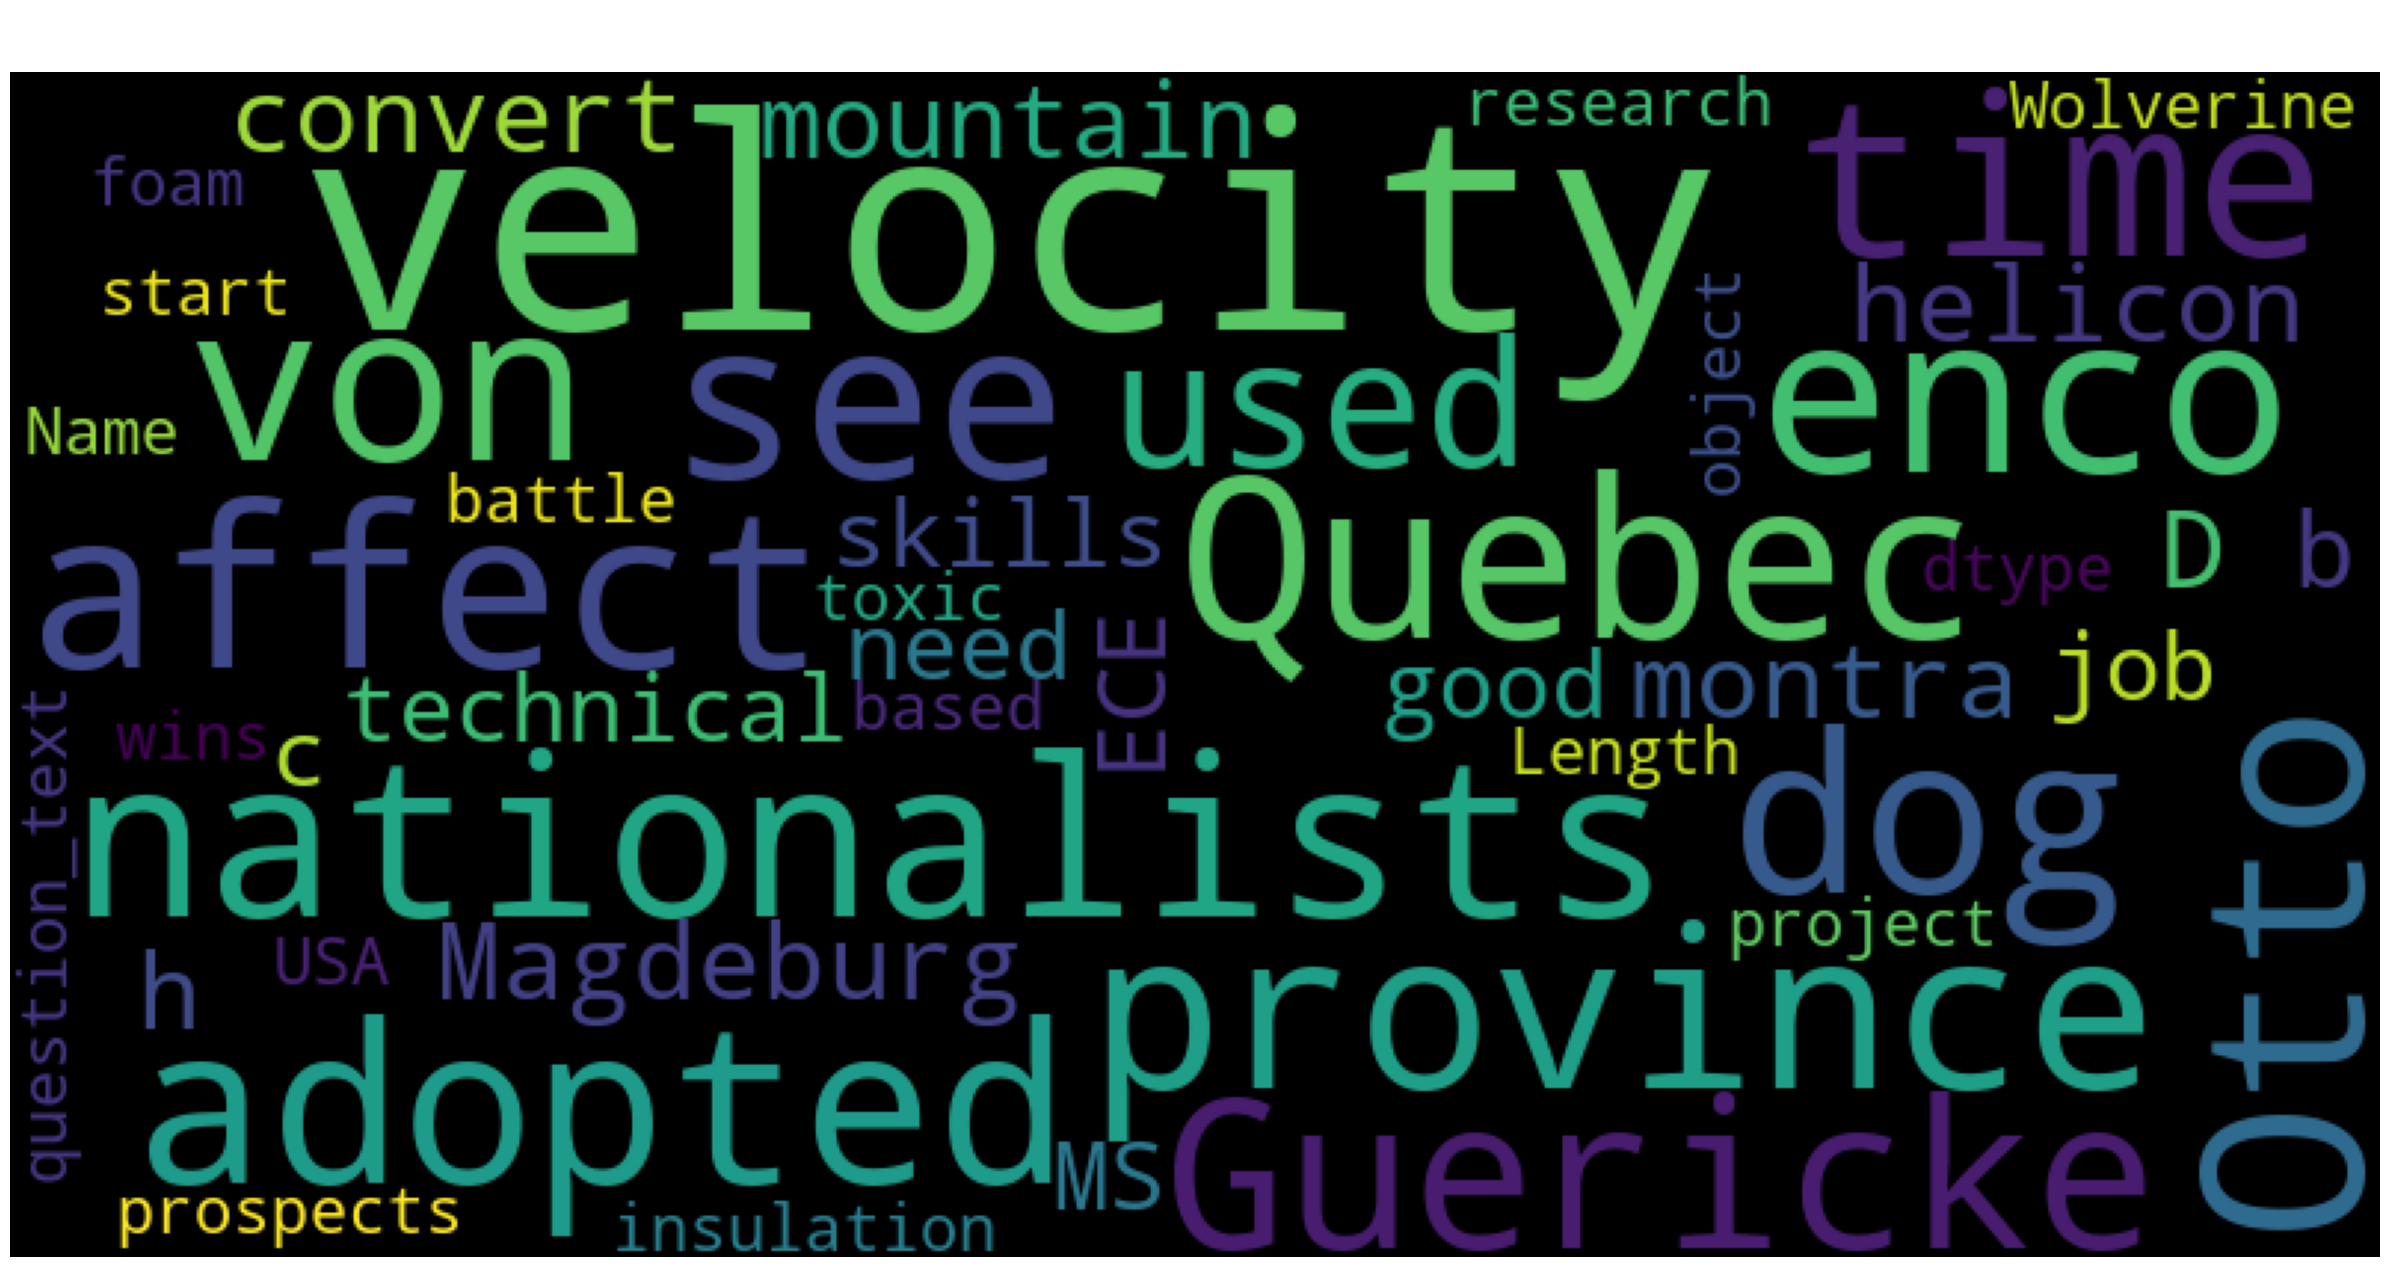

In [18]:
%%time
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'white', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(raw_train_df["question_text"], title="Word Cloud of Questions")

There seem to be a variety of words in there. <br>
Look at the most frequent words in each of the classes separately.

## **Word Frequency plot of sincere & insincere questions:**

In [19]:
%%time
from collections import defaultdict
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py

train1_df = raw_train_df[raw_train_df["target"]==1]
train0_df = raw_train_df[raw_train_df["target"]==0]

## function for n-gram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in train0_df["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')

## bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in train1_df["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                    subplot_titles=["Frequent words of sincere questions", 
                                    "Frequent words of insincere questions"])
fig.add_trace(trace0, 1, 1)
fig.add_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')



CPU times: total: 8.81 s
Wall time: 10.5 s


### Observations:

1. Some of the top words are common across both the classes like 'people', 'will', 'think' etc
2. The other top words in sincere questions after excluding the common ones at the very top are 'best', 'good' etc
3. The other top words in insincere questions after excluding the common ones are 'trump', 'women', 'white' etc

## **Create bigram frequency plots for both classes**

In [20]:
%%time

from collections import defaultdict
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py

freq_dict = defaultdict(int)
for sent in train0_df["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'red')


freq_dict = defaultdict(int)
for sent in train1_df["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.15,
                    subplot_titles=["Frequent bigrams of sincere questions", 
                                    "Frequent bigrams of insincere questions"])
fig.add_trace(trace0, 1, 1)
fig.add_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

CPU times: total: 13.4 s
Wall time: 15.1 s


### Observations:

1. The other top words in sincere questions after excluding the common ones at the very top are 'best', 'year,''people' etc
2. The other top words in insincere questions after excluding the common ones are 'trump', 'women', 'white' and other political words etc

# FEATURE EXTRACTION
___

Create some features to look at the distribution of the classes. 
The ones that we will create are

1. Number of words in the text
2. Number of unique words in the text
3. Number of characters in the text
4. Number of stopwords
5. Number of punctuations
6. Number of upper case words
7. Number of title case words
8. Average length of the words

# **Truncates extreme values in the following features:**

* `num_words`
* `num_punctuations`
* `num_chars`

In [15]:
%%time

from collections import defaultdict
import string  # Import the string module
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py

## Number of words in the text 
raw_train_df["num_words"] = raw_train_df["question_text"].apply(lambda x: len(str(x).split()))
raw_test_df["num_words"] = raw_test_df["question_text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text 
raw_train_df["num_unique_words"] = raw_train_df["question_text"].apply(lambda x: len(set(str(x).split())))
raw_test_df["num_unique_words"] = raw_test_df["question_text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text 
raw_train_df["num_chars"] = raw_train_df["question_text"].apply(lambda x: len(str(x)))
raw_test_df["num_chars"] = raw_test_df["question_text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text 
raw_train_df["num_stopwords"] = raw_train_df["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
raw_test_df["num_stopwords"] = raw_test_df["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text 
raw_train_df["num_punctuations"] =raw_train_df['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
raw_test_df["num_punctuations"] =raw_test_df['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text 
raw_train_df["num_words_upper"] = raw_train_df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
raw_test_df["num_words_upper"] = raw_test_df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text 
raw_train_df["num_words_title"] = raw_train_df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
raw_test_df["num_words_title"] = raw_test_df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text 
raw_train_df["mean_word_len"] = raw_train_df["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
raw_test_df["mean_word_len"] = raw_test_df["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

NameError: name 'STOPWORDS' is not defined

In [16]:
## Truncate some extreme values for better visuals 
raw_train_df['num_words'].loc[raw_train_df['num_words']>60] = 60 #truncation for better visuals
raw_train_df['num_punctuations'].loc[raw_train_df['num_punctuations']>10] = 10 #truncation for better visuals
raw_train_df['num_chars'].loc[raw_train_df['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x='target', y='num_words', data=raw_train_df, ax=axes[0])
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='target', y='num_chars', data=raw_train_df, ax=axes[1])
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.boxplot(x='target', y='num_punctuations', data=raw_train_df, ax=axes[2])
axes[2].set_xlabel('Target', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)

C:\Users\naini\AppData\Local\Temp\ipykernel_31552\2035954289.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: 'num_punctuations'

### Inference:

We can see that the insincere questions have more words as well as characters compared to sincere questions. 
<br>So this might be a useful feature in our model.

In [16]:
X_train = raw_train_df["question_text"].fillna("dieter").values

X_test = raw_test_df["question_text"].fillna("dieter").values
y = raw_train_df["target"]

text = raw_train_df['question_text']

for row in text[:10]:
    print(row)

How did Quebec nationalists see their province as a nation in the 1960s?
Do you have an adopted dog, how would you encourage people to adopt and not shop?
Why does velocity affect time? Does velocity affect space geometry?
How did Otto von Guericke used the Magdeburg hemispheres?
Can I convert montra helicon D to a mountain bike by just changing the tyres?
Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?
Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?
Is it crazy if I wash or wipe my groceries off? Germs are everywhere.
Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?
Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something go your way and feel temporarily at ease. How did things change?


## 1. Remove Numbers
Example: Which is best powerbank for iPhone 7 in India? -> Which is best powerbank for iPhone in India? <br> <br>
`removeNumbers(text)`:<br> This is a function that takes a string (text) as input and removes all the numeric digits from it using a list comprehension. It joins all the non-digit characters back together and returns the modified text.

In [18]:
def removeNumbers(text):
   
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

text_removeNumbers = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_removeNumbers['TextBefore'] = text.copy()

In [19]:
%%time
for index, row in text_removeNumbers.iterrows():
    row['TextAfter'] = removeNumbers(row['TextBefore'])

text_removeNumbers['Changed'] = np.where(text_removeNumbers['TextBefore']==text_removeNumbers['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_removeNumbers[text_removeNumbers['Changed']=='yes']), len(text_removeNumbers), 100*len(text_removeNumbers[text_removeNumbers['Changed']=='yes'])/len(text_removeNumbers)))

1306122 of 1306122 (100.0000%) questions have been changed.
CPU times: total: 1min 14s
Wall time: 2min 20s


In [20]:
for index, row in text_removeNumbers[text_removeNumbers['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

How did Quebec nationalists see their province as a nation in the 1960s? -> nan
Do you have an adopted dog, how would you encourage people to adopt and not shop? -> nan
Why does velocity affect time? Does velocity affect space geometry? -> nan
How did Otto von Guericke used the Magdeburg hemispheres? -> nan
Can I convert montra helicon D to a mountain bike by just changing the tyres? -> nan


## 2. Replace Repetitions of Punctuation
This technique:

1. replaces repetitions of exlamation marks with the tag "multiExclamation"
2. replaces repetitions of question marks with the tag "multiQuestion"
3. replaces repetitions of stop marks with the tag "multiStop"

Example: How do I overcome the fear of facing an interview? It's killing me inside..what should I do? -> How do I overcome the fear of facing an interview? It's killing me inside multiStop what should I do?

In [21]:
def replaceMultiExclamationMark(text):
   
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):
    
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):
   
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

text_replaceRepOfPunct = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_replaceRepOfPunct['TextBefore'] = text.copy()

In [22]:
import re
for index, row in text_replaceRepOfPunct.iterrows():
    row['TextAfter'] = replaceMultiExclamationMark(row['TextBefore'])
    row['TextAfter'] = replaceMultiQuestionMark(row['TextBefore'])
    row['TextAfter'] = replaceMultiStopMark(row['TextBefore'])

In [23]:
text_replaceRepOfPunct['Changed'] = np.where(text_replaceRepOfPunct['TextBefore']==text_replaceRepOfPunct['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes']), len(text_replaceRepOfPunct), 100*len(text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes'])/len(text_replaceRepOfPunct)))

1306122 of 1306122 (100.0000%) questions have been changed.


In [24]:
for index, row in text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

How did Quebec nationalists see their province as a nation in the 1960s? -> nan
Do you have an adopted dog, how would you encourage people to adopt and not shop? -> nan
Why does velocity affect time? Does velocity affect space geometry? -> nan
How did Otto von Guericke used the Magdeburg hemispheres? -> nan
Can I convert montra helicon D to a mountain bike by just changing the tyres? -> nan


## 3. Remove Punctuation
Create an empty DataFrame called `text_removePunctuation` with three columns: 'TextBefore,' 'TextAfter,' and 'Changed.' <br> This DataFrame will be used to store the original text, the modified text after removing punctuation, and a flag indicating whether any changes were made.

Populate the 'TextBefore' column of `text_removePunctuation` with the values from a variable named text, assuming that text is a list or array of text data. <br>

Example: Why haven't two democracies never ever went for a full fledged war? What stops them? -> Why havent two democracies never ever went for a full fledged war What stops them

In [25]:
import string
translator = str.maketrans('', '', string.punctuation)
text_removePunctuation = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_removePunctuation['TextBefore'] = text.copy()

In [26]:
for index, row in text_removePunctuation.iterrows():
    row['TextAfter'] = row['TextBefore'].translate(translator) 

In [27]:
text_removePunctuation['Changed'] = np.where(text_removePunctuation['TextBefore']==text_removePunctuation['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_removePunctuation[text_removePunctuation['Changed']=='yes']), len(text_removePunctuation), 100*len(text_removePunctuation[text_removePunctuation['Changed']=='yes'])/len(text_removePunctuation)))

1306122 of 1306122 (100.0000%) questions have been changed.


In [28]:
for index, row in text_removePunctuation[text_removePunctuation['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

How did Quebec nationalists see their province as a nation in the 1960s? -> nan
Do you have an adopted dog, how would you encourage people to adopt and not shop? -> nan
Why does velocity affect time? Does velocity affect space geometry? -> nan
How did Otto von Guericke used the Magdeburg hemispheres? -> nan
Can I convert montra helicon D to a mountain bike by just changing the tyres? -> nan


In [29]:
for index, row in text_removePunctuation[text_removePunctuation['Changed']=='no'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

## 4. Replace Contractions
This techniques replaces contractions to their equivalents. <br>

`contraction_patterns`: This is a list of tuples, where each tuple consists of two elements. The first element in each tuple is a regular expression pattern that matches a contraction, and the second element is the replacement for that contraction. For example, (r'won\'t', 'will not') matches the contraction "won't" and replaces it with "will not."

`replaceContraction(text)`: This is a function that takes a text input and expands contractions within that text.

Inside the function, it creates a list of patterns and replacements using the contraction_patterns. It does this by iterating through the contraction_patterns list and compiling each regular expression pattern with re.compile(). The compiled pattern and its replacement are stored as a tuple in the patterns list.

Example: What's the scariest thing that ever happened to anyone? -> What is the scariest thing that ever happened to anyone?

In [30]:
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

text_replaceContractions = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_replaceContractions['TextBefore'] = text.copy()

In [31]:
for index, row in text_replaceContractions.iterrows():
    row['TextAfter'] = replaceContraction(row['TextBefore'])

In [32]:
text_replaceContractions['Changed'] = np.where(text_replaceContractions['TextBefore']==text_replaceContractions['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_replaceContractions[text_replaceContractions['Changed']=='yes']), len(text_replaceContractions), 100*len(text_replaceContractions[text_replaceContractions['Changed']=='yes'])/len(text_replaceContractions)))

1306122 of 1306122 (100.0000%) questions have been changed.


In [33]:
for index, row in text_replaceContractions[text_replaceContractions['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

How did Quebec nationalists see their province as a nation in the 1960s? -> nan
Do you have an adopted dog, how would you encourage people to adopt and not shop? -> nan
Why does velocity affect time? Does velocity affect space geometry? -> nan
How did Otto von Guericke used the Magdeburg hemispheres? -> nan
Can I convert montra helicon D to a mountain bike by just changing the tyres? -> nan


## 5. Lowercase
Example: What do you know about Bram Fischer and the Rivonia Trial? -> what do you know about bram fischer and the rivonia trial?

In [34]:
text_lowercase = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_lowercase['TextBefore'] = text.copy()

In [35]:
for index, row in text_lowercase.iterrows():
    row['TextAfter'] = row['TextBefore'].lower()

In [36]:
text_lowercase['Changed'] = np.where(text_lowercase['TextBefore']==text_lowercase['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_lowercase[text_lowercase['Changed']=='yes']), len(text_lowercase), 100*len(text_lowercase[text_lowercase['Changed']=='yes'])/len(text_lowercase)))

1306122 of 1306122 (100.0000%) questions have been changed.


In [37]:
for index, row in text_lowercase[text_lowercase['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

How did Quebec nationalists see their province as a nation in the 1960s? -> nan
Do you have an adopted dog, how would you encourage people to adopt and not shop? -> nan
Why does velocity affect time? Does velocity affect space geometry? -> nan
How did Otto von Guericke used the Magdeburg hemispheres? -> nan
Can I convert montra helicon D to a mountain bike by just changing the tyres? -> nan


## Create a working sample


In [38]:
SAMPLE_SIZE = 100_000  
sample_df = raw_train_df.sample(SAMPLE_SIZE, random_state=42)

In [39]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


# TEXT PREPROCESSING
---
**Outline:**

1. Understand the bag of words model
2. Tokenization
3. Stop word removal
4. Stemming

## Bag of Words Intuition

* Create a list of all the words across all the text documents.
* Convert each document into a vector of word counts.

**Limitations:**

* The dataset may contain too many words.
* Some words may occur too frequently.
* Some words may occur very rarely or only once.
* A single word may have many forms (e.g., go, gone, going, or bird vs. birds).


**Take one example from sincere_df**

In [41]:
q0 = sincere_df.question_text.values[1]

In [42]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

**Take one example from insincere_df**

In [43]:
q1 = raw_train_df[raw_train_df.target == 1].question_text.values[0]

In [44]:
q1

'Has the United States become the largest dictatorship in the world?'

# TOKENIZATION
___
Tokenization is the process of splitting a documentation into words and separators so we tokenize by splitting along the spaces or we can use a tool which also detects punctuations properly


In [45]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Take first question and tokenize

In [49]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [50]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [51]:
q1

'Has the United States become the largest dictatorship in the world?'

In [52]:
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [53]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

In [54]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

# STOPWORD REMOVAL
---
Removing commonly occuring words

In [55]:
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# print stopwords
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [57]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

In [58]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [59]:
q0_stp = remove_stopwords(q0_tok)

In [60]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [61]:
q1_stp = remove_stopwords(q1_tok)

In [62]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [63]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

# STEMMING 
___

Stemming is a text processing technique used in natural language processing (NLP) and information retrieval to reduce words to their root or base form. The idea behind stemming is to group together words with the same meaning but different inflections or derivations. For example, the words "jumps," "jumping," and "jumped" can all be stemmed to the base form "jump."

The code you provided uses the SnowballStemmer from the Natural Language Toolkit (NLTK), a popular Python library for NLP, to perform stemming specifically for the English language.
<br>

"go", "gone", "going" -> "go"
"birds", "bird" -> "bird"

In [67]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')

In [68]:
stemmer.stem('going')

'go'

In [69]:
stemmer.stem('supposedly')

'suppos'

In [70]:
q0_stm = [stemmer.stem(word) for word in q0_stp]

In [71]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [72]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [73]:
q1_stm = [stemmer.stem(word) for word in q1_stp]

In [74]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [75]:
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

# IMPLEMENT BAG OF WORDS
---

**Outline:** 

* Create a vocabulary using Count Vectorizer
* Transform text to vectors using Count Vectorizer
* Configure text preprocessing in Count Vectorizer
* Create a Vocabulary

In [76]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [77]:
# 10000 sample DF broken to small values 
small_df = sample_df[:5]

In [78]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

## Count Vectorizer
1. Create a vocabulary and count vectorizer is a helper class from the scikit-learn library.
2. Vectorizer converts a collection of text documents into a matrix of token counts that identifies the vocabulary which is the set of unique words that occur in these documents ,then turns each document into a vector using the counts of those words within those documents

**Count Vectorization** is a technique that converts a collection of text documents into a matrix of word counts.<br>

* It creates a numerical representation of the text data by counting the frequency of each word in the document. <br>

* Each document is represented as a vector where each element corresponds to the count of a specific word in the document. <br>

* In Count Vectorization, common English words (stop words) are often removed, and the remaining words are stemmed to further reduce the vocabulary size.
This method is simple and easy to implement. <br>

* It is effective for many NLP tasks, especially when the emphasis is on word frequency. <br>

* It doesnot consider the importance of words, treating all words equally.

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
small_vect = CountVectorizer()

In [85]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [86]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [87]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

## Transform documents into Vectors

In [88]:
vectors = small_vect.transform(small_df.question_text)

In [89]:
vectors

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [90]:
vectors.shape

(5, 51)

In [91]:
small_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [92]:
vectors[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0]], dtype=int64)

In [93]:
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]], dtype=int64)

## Configure Count Vectorizer Parameters

In [94]:
stemmer = SnowballStemmer(language='english')

In [95]:
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [96]:
tokenize('What is the really (dealing) here?')

['what', 'is', 'the', 'realli', '(', 'deal', ')', 'here', '?']

In [97]:
vectorizer = CountVectorizer(lowercase=True, 
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [98]:
%%time
vectorizer.fit(sample_df.question_text)

C:\Users\naini\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

C:\Users\naini\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.



CPU times: total: 24.5 s
Wall time: 49.8 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x00000245276CE660>)

In [99]:
len(vectorizer.vocabulary_)

1000

In [100]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

## Convert and transform our text questions into vectors <br>
Call these inputs because these are going to be input into a machine-learning model

In [101]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: total: 25.7 s
Wall time: 53.3 s


In [102]:
inputs.shape

(100000, 1000)

In [103]:
inputs

<100000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 548298 stored elements in Compressed Sparse Row format>

In [104]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [105]:
raw_test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [106]:
%%time
test_inputs = vectorizer.transform(raw_test_df.question_text)

CPU times: total: 1min 25s
Wall time: 3min 4s


In [107]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [108]:
inputs.shape

(100000, 1000)

# TFIDF TOKENIZATION

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a more advanced vectorization technique that considers both the term frequency (how often a word appears in a document) and the inverse document frequency (how unique or important a word is across the entire document collection).<br>

TF-IDF assigns a weight to each word in a document based on how often it appears in that document (term frequency) and how rare it is across all documents in the dataset (inverse document frequency).

In [109]:
%%time

import nltk
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language="english")

en_stopwords = nltk.corpus.stopwords.words('english')


from sklearn.feature_extraction.text import TfidfVectorizer
def tokenize_and_stem(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]
# creating count vectorizer object with configuration to incorporate preprocessing techniques together
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words=en_stopwords, #removing stopwords
                             tokenizer=tokenize_and_stem #tokenization and stemming at the same time
                             )

vectorizer.fit(raw_train_df['question_text'])

C:\Users\naini\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

C:\Users\naini\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.



CPU times: total: 5min 54s
Wall time: 10min 27s


TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize_and_stem at 0x000002453C1E8040>)

In [110]:
len(vectorizer.vocabulary_)
vectorizer.get_feature_names_out()[:100]

array(['\x02tñ\x7f¼é\x1aaùõ\x8d¶rwìiìñó', '\x10i', '\x10new', '\x10œø',
       '\x17', '!', '#', '$', '%', '&', "'", "''", "'+", "'-", "'\\",
       "'d", "'m", "'n", "'s", "'t", "'~", "'—", "'…", '(', ')', '*', '+',
       '++', '++=', '++\\sqrt', '++a/a', '++compil', '++i', '++j', '++p',
       '+-', '+-100', '+-60', '+-ln', '+.1mg', '+/-', '+/-1', '+/-15v',
       '+/-2', '+/720', '+0', '+0.00206x', '+0.12929=0', '+0.50', '+0o',
       '+1', '+1,2,3,4', '+1.00', '+1.0pccharg', '+1.25', '+1.25d',
       '+1.5', '+1.50', '+1/', '+1/100', '+1/2', '+1/3+1/4+', '+1/6',
       '+1/e^x-1', '+1/q+1/r=', '+1/x', '+10', '+100', '+1000', '+100k',
       '+10=', '+10^', '+10k', '+11', '+11x-6=0', '+12', '+125mhz',
       '+12°', '+13', '+13x^2', '+1400', '+14x3-2x2+7x-8', '+15', '+150',
       '+160', '+16=0', '+175', '+18', '+1=0', '+1\\', '+1k', '+2',
       '+2.0', '+2/3', '+20', '+2000', '+2002', '+21', '+212', '+23'],
      dtype=object)

In [111]:
%%time
model_inputs = vectorizer.transform(raw_train_df['question_text'])

CPU times: total: 6min 20s
Wall time: 10min 35s


In [112]:
model_inputs.shape

model_inputs

raw_train_df['question_text'].values[0]

model_inputs[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [113]:
%%time
test_inputs = vectorizer.transform(raw_test_df['question_text'])

CPU times: total: 1min 30s
Wall time: 3min 9s


In [114]:
test_inputs

<375806x215118 sparse matrix of type '<class 'numpy.float64'>'
	with 2951658 stored elements in Compressed Sparse Row format>

#### Count Vectorizer is simpler and may work well if you have a straightforward problem or limited data. 
#### TF-IDF Vectorizer is often preferred when you want to give more importance to the unique or discriminating words and reduce the influence of common words.

# LOGISTIC REGRESSION MODEL
___

Logistic Regression is a supervised machine learning algorithm commonly used for binary classification tasks, like determining whether a question is sincere or insincere.

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target, 
                                                                        test_size=0.3, random_state=42)

`train_test_split from sklearn.model_selection.` <br>

split data into two parts: the training set (70% of the data) and the validation set (30% of the data).<br>
The training set is used to train the model, while the validation set is used to evaluate its performance.

In [117]:
train_inputs.shape

(70000, 1000)

In [118]:
train_targets.shape

(70000,)

In [119]:
val_inputs.shape

(30000, 1000)

In [120]:
val_targets.shape

(30000,)

`sklearn.linear_model.LogisticRegression.` <br>

set the maximum number of iterations (MAX_ITER) and the solver used by the `logistic regression model ('sag').`<br>

The max_iter parameter specifies the maximum number of iterations taken for the solver to converge, and 'sag' stands for` Stochastic Average Gradient descent`.

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
MAX_ITER = 1000

In [123]:
model = LogisticRegression(max_iter=MAX_ITER, solver='sag')

In [124]:
%%time
model.fit(train_inputs, train_targets)

CPU times: total: 15.4 s
Wall time: 24.1 s


C:\Users\naini\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(max_iter=1000, solver='sag')

In [125]:
train_preds = model.predict(train_inputs)

In [126]:
train_targets

133883     0
343925     0
1190558    0
317078     0
355610     0
          ..
262505     0
879467     0
411614     0
859707     0
683832     0
Name: target, Length: 70000, dtype: int64

In [127]:
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [128]:
pd.Series(train_preds).value_counts()

0    67957
1     2043
Name: count, dtype: int64

In [129]:
pd.Series(train_targets).value_counts()

target
0    65784
1     4216
Name: count, dtype: int64

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(train_targets, train_preds)

0.9504428571428571

In [132]:
accuracy_score(train_targets, np.zeros(len(train_targets)))

0.9397714285714286

In [133]:
from sklearn.metrics import f1_score

In [134]:
f1_score(train_targets, train_preds)

0.4457581083240134

In [135]:
f1_score(train_targets, np.zeros(len(train_targets)))

0.0

In [136]:
random_preds = np.random.choice((0, 1), len(train_targets))
f1_score(train_targets, random_preds)

0.10738426874231871

In [137]:
val_preds = model.predict(val_inputs)

In [138]:
accuracy_score(val_targets, val_preds)

0.9466666666666667

In [139]:
f1_score(val_targets, val_preds)

0.4082840236686391

## Evaluation Metrics
To assess the model's performance, 
These metrics provide insights into how well your model is performing for the specific task of classifying sincere and insincere questions.

**Accuracy:** It measures the overall correctness of your model's predictions, i.e., the proportion of correctly predicted labels to the total number of samples.

**Precision**: Precision measures the accuracy of the positive predictions made by the model. It is the ratio of true positive predictions to the total number of positive predictions.

**Recall**: Recall (Sensitivity or True Positive Rate) measures how well the model identifies all positive instances. It is the ratio of true positive predictions to the total number of actual positive instances.

**F1 Score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when the class distribution is imbalanced.

## Calculate `Precision`,`Recall`,`F1 score`,`Accuracy`

In [140]:
from sklearn.metrics import precision_score, recall_score

# Calculate predictions on the validation set
val_preds = model.predict(val_inputs)

# Calculate accuracy
accuracy = accuracy_score(val_targets, val_preds)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(val_targets, val_preds)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(val_targets, val_preds)
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(val_targets, val_preds)
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.95
Precision: 0.63
Recall: 0.30
F1 Score: 0.41


## A guideline for interpreting these metrics:

An **accuracy of 0.95 (95%)** is relatively high, indicating that the model is making correct predictions for a large portion of the data.<br>
However, If the dataset has a significant class imbalance (e.g., a lot of sincere questions and relatively few insincere questions), a high accuracy might not be a reliable indicator of model performance.

A **precision of 0.63 (63%)** suggests that the model is decent at correctly identifying insincere questions when it predicts them. Out of all the questions it predicts as insincere, 63% are correct. However, if precision is more crucial in your application (e.g., false positives are costly), you might want a higher precision.

A **recall of 0.30 (30%)** indicates that the model is identifying only 30% of the actual insincere questions. This may be a concern if you want to capture as many insincere questions as possible. A lower recall might lead to missing important insincere questions.

 The F1 score is the harmonic mean of precision and recall.
A value of **F1 score of 0.41** suggests a trade-off between precision and recall. It's often used when you need a balanced measure of both precision and recall. 

# NAIVE BAYES MODEL

### Use of Naive Bayes Model for Prediction

Naive Bayes is a probabilistic classification algorithm that is often used for text classification tasks. It is a simple but effective algorithm that is easy to train and implement.

Naive Bayes works by assuming that the features of a data point are independent of each other. This means that the presence of one feature does not affect the presence of another feature. For example, the presence of the word "love" in a question does not affect the presence of the word "hate" in the question.

To predict the class of a data point, Naive Bayes calculates the probability of the data point belonging to each class. The class with the highest probability is then predicted as the class of the data point.

In [142]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(train_inputs, train_targets)

# Predict on the validation set
val_preds_nb = model_nb.predict(val_inputs)

# Calculate `Precision` , `Recall` ,` F1 score` , `Accuracy`

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate and print accuracy
accuracy_nb = accuracy_score(val_targets, val_preds_nb)
print(f'Accuracy (Naive Bayes): {accuracy_nb:.2f}')

# Calculate and print precision
precision_nb = precision_score(val_targets, val_preds_nb)
print(f'Precision (Naive Bayes): {precision_nb:.2f}')

# Calculate and print recall
recall_nb = recall_score(val_targets, val_preds_nb)
print(f'Recall (Naive Bayes): {recall_nb:.2f}')

# Calculate and print F1 score
f1_nb = f1_score(val_targets, val_preds_nb)
print(f'F1 Score (Naive Bayes): {f1_nb:.2f}')


Accuracy (Naive Bayes): 0.94
Precision (Naive Bayes): 0.48
Recall (Naive Bayes): 0.52
F1 Score (Naive Bayes): 0.50


## A guideline for interpreting these metrics:

**Accuracy (Naive Bayes): 0.94:** An accuracy of 94% indicates that the model is making correct predictions for a large portion of the data. However, accuracy can be misleading in imbalanced datasets, where one class significantly outnumbers the other. In such cases, a high accuracy might not be a reliable indicator of model performance.

** Precision (Naive Bayes): 0.48:** A precision of 48% means that the model is moderately accurate when predicting insincere questions. It implies that out of all the questions it predicts as insincere, 48% are correct. The relatively lower precision suggests that there may be a notable number of false positives (insincere predictions on sincere questions).

**Recall (Naive Bayes): 0.52:** A recall of 52% indicates that the model captures more than half of the actual insincere questions. This suggests that the model is reasonably good at identifying insincere questions, but it still misses a significant portion of them.

**F1 Score (Naive Bayes): 0.50:** The F1 score is a balance between precision and recall. An F1 score of 0.50 suggests that the model is providing a trade-off between precision and recall.

In summary, the provided metrics suggest that the Multinomial Naive Bayes model is reasonably effective in classifying questions as sincere or insincere. However, there is room for improvement, especially in terms of precision and recall. The suitability of these metrics depends on your project's specific requirements and the relative importance of false positives and false negatives


![alt text](score.png "RMSE")

As you can see, the logistic regression model has a higher accuracy, but the Naive Bayes model has higher precision, recall, and F1 score.

## Conclusion

Both `logistic regression` and `Naive Bayes` are simple and effective algorithms for text classification. 

# CNN MODEL
___

## Use of Advanced Convolutional Neural Network Model for Prediction

`Convolutional neural networks (CNNs)` are a type of neural network that are well-suited for text classification tasks.<br>
CNNs are able to learn patterns in the data that are difficult for other machine learning algorithms to learn.

The CNN model you have provided is a simple but effective model for text classification. The model consists of the following components:

1. **Embedding layer**: The embedding layer converts the words into vectors of numbers. This allows model to learn the relationships between words.
2. **Conv1D layer**: The Conv1D layer convolves the word vectors to learn patterns in the data.
3. **GlobalMaxPooling1D layer**: The GlobalMaxPooling1D layer extracts the most important features from the convolved word vectors.
4. **Dense layer**: The Dense layer predicts the probability of the text being sincere or insincere.

In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [145]:
# Load your data
nlp_train_df = pd.read_csv('train.csv',engine='python')
nlp_test_df = pd.read_csv('test.csv',engine='python')

## TOKENIZE & PREPROCESS

In [146]:
# Tokenize and preprocess the text data
max_words = 5000  # Maximum number of words in the vocabulary
max_sequence_length = 100  # Maximum sequence length

### Lowercase, remove puntuation, stop word removal, stemming

In [147]:
# Text preprocessing functions
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = text.split()
    
    # Stop word removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

## Train and Test split

In [148]:
nlp_train_df['question_text'] = nlp_train_df['question_text'].apply(preprocess_text)
nlp_test_df['question_text'] = nlp_test_df['question_text'].apply(preprocess_text)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(nlp_train_df['question_text'])

train_sequences = tokenizer.texts_to_sequences(nlp_train_df['question_text'])
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, nlp_train_df['target'], test_size=0.3, random_state=42)


## Build the CNN model

The `128` parameter specifies the number of `filters in the Conv1D layer`. <br>
The `5` parameter specifies the `size of the filters`. <br>
The `relu` parameter specifies the activation function used in the Conv1D layer.<br>
The `1` parameter specifies the number of output units in the `Dense layer`. <br>
The `sigmoid` parameter specifies the activation function used in the Dense layer.                              

In [149]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

## Train model and make prediction

In [150]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=128, verbose=1)

# Tokenize and preprocess the test data
test_sequences = tokenizer.texts_to_sequences(nlp_test_df['question_text'])
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Make predictions on the test data
test_preds = model.predict(X_test)
test_preds = (test_preds > 0.5).astype(int)

Epoch 1/3
7143/7143 [==============================] - 452s 62ms/step - loss: 0.1522 - accuracy: 0.9458 - val_loss: 0.1267 - val_accuracy: 0.9508
Epoch 2/3
7143/7143 [==============================] - 473s 66ms/step - loss: 0.1261 - accuracy: 0.9503 - val_loss: 0.1234 - val_accuracy: 0.9517
Epoch 3/3
11744/11744 [==============================] - 121s 10ms/step


# Calculate `Precision` , `Recall` ,` F1 score` , `Accuracy`

In [151]:
# Calculate performance metrics
accuracy = accuracy_score(y_val, model.predict(X_val) > 0.5)
precision = precision_score(y_val, model.predict(X_val) > 0.5)
recall = recall_score(y_val, model.predict(X_val) > 0.5)
f1 = f1_score(y_val, model.predict(X_val) > 0.5)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

12245/12245 [==============================] - 121s 9ms/step
Accuracy: 0.95
Precision: 0.66
Recall: 0.45
F1 Score: 0.53


The provided values for accuracy, recall, precision, and F1 score are indeed strong indicators of good performance for the CNN model in your NLP text classification project. 



An **accuracy of 95%** suggests that the model is making correct predictions for the vast majority of the data.
This is a high level of overall correctness, indicating the model's ability to distinguish between sincere and insincere questions.

A **precision of 66%** is a notable level of accuracy when it comes to predicting insincere questions. 
It implies that out of all the questions the model predicts as insincere, 66% are correct. 
This high precision is particularly valuable if you want to minimize false positives.

**A recall of 45%** indicates that the model is capturing almost half of the actual insincere questions. 
While not extremely high, it's still a respectable level of recall. 
This suggests that the model is effective at identifying insincere questions and minimizes false negatives.

**F1 Score of 0.53** indicates that the model strikes a good balance between minimizing false positives and false negatives.

These metrics collectively suggest that your CNN model is performing well in classifying questions as sincere or insincere, and it's achieving a good trade-off between precision and recall. 

In summary, the provided metrics indicate a strong model performance, and the CNN is a promising choice for your text classification task.

# RESULTS
___

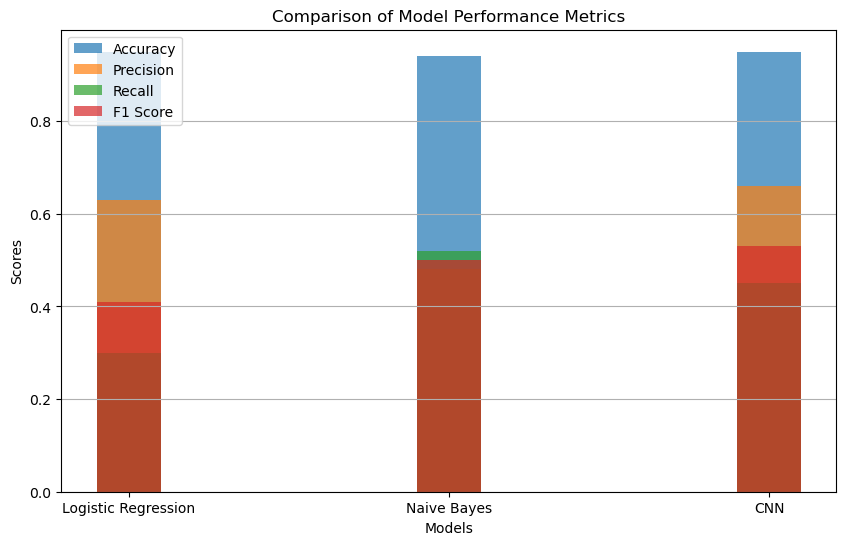

In [158]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Naive Bayes', 'CNN']
accuracy = [0.95, 0.94, 0.95]
precision = [0.63, 0.48, 0.66]
recall = [0.30, 0.52, 0.45]
f1_score = [0.41, 0.50, 0.53]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, label='Accuracy', alpha=0.7, width=0.2)
plt.bar(models, precision, label='Precision', alpha=0.7, width=0.2)
plt.bar(models, recall, label='Recall', alpha=0.7, width=0.2)
plt.bar(models, f1_score, label='F1 Score', alpha=0.7, width=0.2)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show()


# Interpretation of Model Performance


## Logistic Regression

- **Accuracy (Logistic Regression): 0.95**
  - Logistic Regression achieved a high level of accuracy, indicating that it correctly classified a significant portion of the questions.

- **Precision (Logistic Regression): 0.63**
  - The precision score suggests that when the model predicts a question as insincere, it is correct about 63% of the time. This precision score is moderate but not exceptionally high.

- **Recall (Logistic Regression): 0.30**
  - Logistic Regression's recall score is relatively low, indicating that it misses a significant number of insincere questions. This leads to a substantial number of false negatives.

- **F1 Score (Logistic Regression): 0.41**
  - The F1 score is a harmonic mean of precision and recall. In the case of Logistic Regression, the F1 score suggests a moderate balance between precision and recall.

## Naive Bayes (MultinomialNB)

- **Accuracy (Naive Bayes): 0.94**
  - Naive Bayes achieved a good level of accuracy, indicating overall correctness in classifying questions.

- **Precision (Naive Bayes): 0.48**
  - The precision score suggests that when Naive Bayes predicts a question as insincere, it is correct about 48% of the time. It's not as high as desired but provides a trade-off with recall.

- **Recall (Naive Bayes): 0.52**
  - Naive Bayes demonstrates a relatively higher recall, indicating its effectiveness in capturing insincere questions.

- **F1 Score (Naive Bayes): 0.50**
  - The F1 score for Naive Bayes suggests a balanced performance, achieving a trade-off between precision and recall.

## CNN (Convolutional Neural Network)

- **Accuracy (CNN): 0.95**
  - The CNN model, like Logistic Regression, achieved a high level of accuracy, correctly classifying a significant portion of the questions.

- **Precision (CNN): 0.66**
  - CNN demonstrates a higher precision score, indicating that when it predicts a question as insincere, it is correct about 66% of the time. This is a strong precision score.

- **Recall (CNN): 0.45**
  - While the recall score for CNN is respectable, it could be further improved to capture more insincere questions.

- **F1 Score (CNN): 0.53**
  - The F1 score for CNN is the highest among the models, indicating a good balance between precision and recall.


# Strengths and Weaknesses of Each Model

## Logistic Regression

**Strengths:**
- Simple and easy to interpret 
- Achieves a high level of accuracy, indicating overall correctness. It can serve as a good baseline model.

**Weaknesses:**
- Can be overfitting to the training data
- Not as good at learning complex patterns in the data
- Low recall suggests that it misses a significant number of insincere questions, leading to false negatives.


## Naive Bayes

**Strengths:**
- Simple and easy to train
- Achieves a balanced F1 score, providing a trade-off between precision and recall. Suitable for binary classification tasks.

**Weaknesses:**
- Not as good at learning complex patterns in the data
- Sensitive to the distribution of the data
- Moderately lower precision may result in some false positives.


## CNN (Convolutional Neural Network)

**Strengths:**
- Can learn complex patterns in the data
- High accuracy and precision, along with reasonable recall and F1 score, demonstrate strong overall performance. Particularly effective in distinguishing insincere questions.

**Weaknesses:**
- Requires more data to train
- Can be computationally expensive
- While recall is respectable, it could be further improved to capture more insincere questions.


# Analysis and Discussion


## Potential Improvements

### Logistic Regression:
- Use regularization techniques, such as L1 or L2 regularization, to prevent overfitting.
- Use feature engineering to create new features that may be more informative for the model.
- Hyperparameter tuning, feature engineering, and handling class imbalance might improve recall.

### Naive Bayes:
- Use feature engineering to create new features that may be more informative for the model.
- Use smoothing techniques to address the assumption that features are independent of each other.
- Exploring other variants of Naive Bayes or ensemble methods for improved precision.

### CNN:
- Use pre-trained word embeddings to initialize the embedding layer.
- Use data augmentation techniques to increase the size and diversity of the training data.
- Hyperparameter tuning, increasing model complexity, and using more advanced embedding techniques (e.g., pre-trained word embeddings) might enhance recall.


# CONCLUSION
___

- The `CNN model` outperforms the base models in terms of accuracy, precision, recall, and F1 score. 
It demonstrates strengths in effectively identifying insincere questions and achieving a balance between precision and recall.

- Logistic Regression serves as a good baseline model with high accuracy but falls short in recall. Potential improvements can be explored to enhance recall.

- Naive Bayes (MultinomialNB) offers a balanced performance but may benefit from further refinement in precision.

- To further enhance model performance, it's essential to consider factors like `class imbalance`, `data preprocessing`, and `hyperparameter tuning`.


## Additional Considerations

- Computational resources: CNNs require more computational resources to train than logistic regression or Naive Bayes.
- Interpretability: Logistic regression and Naive Bayes are more interpretable than CNNs, meaning that it is easier to understand how they make predictions.
- Time to train: CNNs can take longer to train than logistic regression or Naive Bayes.

